In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import operator
import pprint
from matplotlib import pyplot as plt
from IPython.display import Math
import pypropep as ppp

In [2]:
plt.style.use(u'ggplot')

## Initalization
First we must initalize the library to load the thermo and propellant files.  Note that they can be overriden in the init function.

In [3]:
help(ppp.init)
ppp.init()

Help on function init in module pypropep:

init(thermo_file=None, propellant_file=None)

Loaded 1921 thermo species
Loaded 1030 propellants


In [4]:
print ppp.find_propellant('methane')

[Propellant: C1H1N3O6 - TRINITROMETHANE (NITROFORM) [949], Propellant: C1F8N4 - TETRAKISDIFLUOROAMINOMETHANE [869], Propellant: C1O6N3CL1 - TRINITROCHLOROMETHANE [942], Propellant: C1N4O8 - TETRANITROMETHANE [878], Propellant: C1O6N3F1 - TRINITROFLUOROMETHANE [946], Propellant: C1H1O6N3 - TRINITROMETHANE [948], Propellant: C1H4 - METHANE [578], Propellant: C1O6N3BR1 - TRINITROBROMEMETHANE [941], Propellant: C1F4O2 - BIS(FLUOROXY)DIFLUOROMETHANE [158], Propellant: C1BR1F3 - BROMOTRIFLUOROMETHANE [181], Propellant: C1H3N1O2 - NITROMETHANE [645], Propellant: C1F4O2 - BIS(FLUOROXY)DIFLUOROMETHANE [159], Propellant: C1F4O1 - FLUOROXYTRIFLUOROMETHANE [383]]


You can get a pretty formula if you want...

In [5]:
Math(ppp.PROPELLANTS['EICOSANE (PARAFFIN)'].formula(tex=True))

<IPython.core.display.Math object>

### Auto-completion of propellants
Rather than searching, jupyter/ipython will auto-complete dictonary keys.  So you can simply do:

```
>>> p = ppp.PROPELLANTS['OXY[TAB]
```
and when you enter [tab] it will either autocomplete the key if there is only one match or pop-up a menu with all the keys that match to chose from.  Note that it will only match from the beginning of the string so if you want to match something mid-name then you'll still have to use find_propellant.

### Sanity checking properties
Let's see how well cpropep is computing thermo properties for nitrogen. [TODO: Put reference properties here]

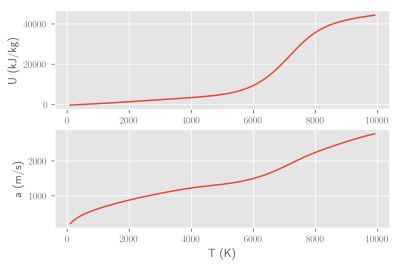

In [6]:
e = ppp.Equilibrium()
air = ppp.PROPELLANTS['NITROGEN (GASEOUS)']
e.add_propellant(air, 1.)
T_v = np.arange(100, 10000, 100)
U_v = np.zeros_like(T_v)
a_v = np.zeros_like(T_v)
for i in xrange(len(T_v)):
    e.set_state(P=1., T=T_v[i], type='TP')
    U_v[i] = e.properties.U
    a_v[i] = e.properties.Vson

ax = plt.subplot(211)
plt.plot(T_v, U_v)
plt.ylabel('U (kJ/kg)')

plt.subplot(212, sharex=ax)
plt.plot(T_v, a_v)
plt.xlabel('T (K)')
plt.ylabel('a (m/s)')


In [7]:
e.set_state(P=1., T=273, type='TP')
print e
print e.composition

Status:
	Equillibrium Computed: True
	Properties Computed: True
	Performance Computed: False
Composition:
	NITROGEN (GASEOUS) - 1.000 mol
State:
	Pressure: 1.000 atm 
	Temperature: 273.0 K 
	Enthalpy: -26.143 kJ/kg 
	Int. Energy: -107.171 kJ/kg 
	Gibbs Free Energy: -1867.365 kJ/kg 
	Entropy: 6.744 kJ/kg-K 
	Molar Mass: 28.013 g/mol 
	dV_P: -1.000
	dV_T: 1.000
	Cp: 1.039 kJ/kg-K
	Cv: 0.743 kJ/kg-K
	gamma: 1.400
	Sound Speed: 336.8 m/s

{'N2': 1.0, 'N3': 0.0, 'N': 0.0}


### Setting up equllibrium calculations
Below is an example for how to setup a simple equillibrium calculation.

First load propellants...

In [17]:
e2 = ppp.Equilibrium()
o2 = ppp.PROPELLANTS['OXYGEN (GAS)']
ch4 = ppp.PROPELLANTS['METHANE']
e2.add_propellants([(o2, 1.), (ch4, 1.)])
print e2

Status:
	Equillibrium Computed: False
	Properties Computed: False
	Performance Computed: False
Composition:
	OXYGEN (GAS) - 1.000 mol
	METHANE - 1.000 mol
State:
	Pressure: 0.000 atm 
	Temperature: 0.0 K 
	Enthalpy: 0.000 kJ/kg 
	Int. Energy: 0.000 kJ/kg 
	Gibbs Free Energy: 0.000 kJ/kg 
	Entropy: 0.000 kJ/kg-K 
	Molar Mass: 0.000 g/mol 
	dV_P: 0.000
	dV_T: 0.000
	Cp: 0.000 kJ/kg-K
	Cv: 0.000 kJ/kg-K
	gamma: 0.000
	Sound Speed: 0.0 m/s

None


Then let's specify state an equillibrate:

In [15]:
e2.set_state(P=1., T=500., type='TP')
print e2
pprint.pprint(e2.composotion_sorted[0:8])

Status:
	Equillibrium Computed: True
	Properties Computed: True
	Performance Computed: False
Composition:
	OXYGEN (GAS) - 1.000 mol
	METHANE - 1.000 mol
State:
	Pressure: 1.000 atm 
	Temperature: 500.0 K 
	Enthalpy: -9614.655 kJ/kg 
	Int. Energy: -9788.449 kJ/kg 
	Gibbs Free Energy: -14225.997 kJ/kg 
	Entropy: 9.223 kJ/kg-K 
	Molar Mass: 23.921 g/mol 
	dV_P: -1.002
	dV_T: 1.042
	Cp: 2.222 kJ/kg-K
	Cv: 1.845 kJ/kg-K
	gamma: 1.202
	Sound Speed: 457.0 m/s

[('H2O', 0.5572093043680204),
 ('CO2', 0.15691014335132136),
 ('CH4', 0.15328316358752236),
 ('H2', 0.0072685461309855625),
 ('CO', 1.4950587821761794e-05),
 ('C2H6', 1.2132815781580734e-07),
 ('CH3COOH', 0.0),
 ('C4H8,cyclo-', 0.0)]
